In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
wine_df = pd.read_csv('wine_data.csv')
wine_df

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


#### 와인데이터 시각화

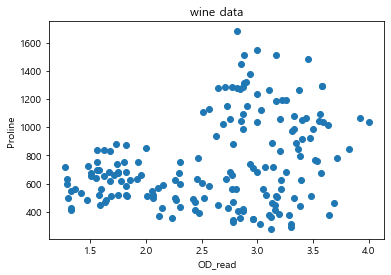

In [4]:
plt.scatter(wine_df.values[:,0],wine_df.values[:,1])
plt.title('wine data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### K-means

In [5]:
km = KMeans(n_clusters=3) # 모델 선정(군집=3)
km_clusters=km.fit_predict(wine_df) #모델 학습,예측(군집화)

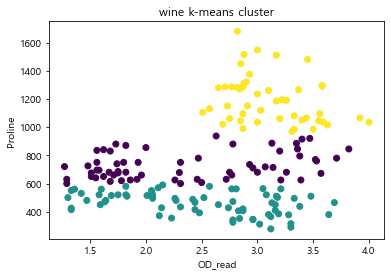

In [6]:
#시각화
plt.scatter(wine_df.values[:,0],wine_df.values[:,1],c=km_clusters)
plt.title('wine k-means cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### 계층적 군집분석

In [7]:
ac = AgglomerativeClustering(n_clusters=3,linkage='ward')
#모델 선정(sklearn 라이브러리,3개 군집,군집화 방법=ward)
ac_clusters=ac.fit_predict(wine_df)
#모델 학습,예측(변환,군집화)

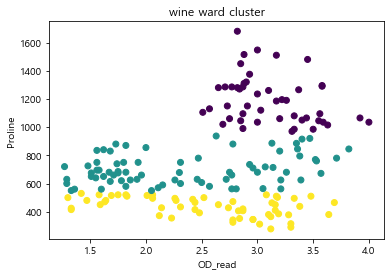

In [8]:
#시각화
plt.scatter(wine_df.values[:,0],wine_df.values[:,1],c=ac_clusters)
plt.title('wine ward cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

#### 실루엣 점수
- 1~-1까지 점수가 나옴
- 클러스터를 완벽하게 분류했을 때 : 1
- 클러스터가 별로일 때 : 낮은 값
- 얼마나 클러스터가 잘 군집이 형성되었는지 수치로 나타내주는 지표(유효성)

In [9]:
#유효성
print('Silhouette score\n')
print('k-means:',silhouette_score(wine_df,km_clusters))
print('ward:',silhouette_score(wine_df,ac_clusters))

Silhouette score

k-means: 0.5809421087616886
ward: 0.5651908644787632


### scipy 라이브러리 사용

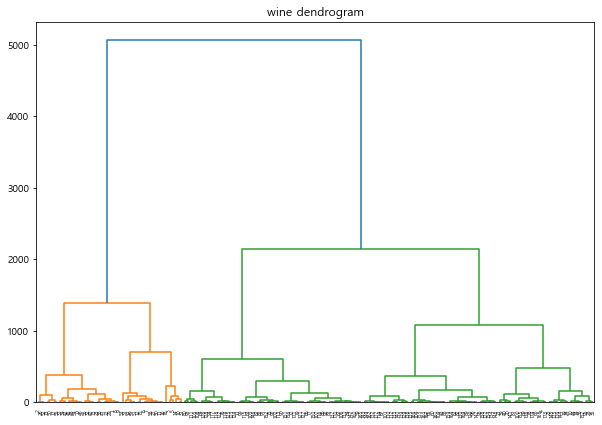

In [10]:
from scipy.cluster.hierarchy import dendrogram,linkage

#덴드로그램 그래프 작성
plt.figure(figsize= (10,7))
plt.title('wine dendrogram')
d=dendrogram(linkage(wine_df,method='ward'))

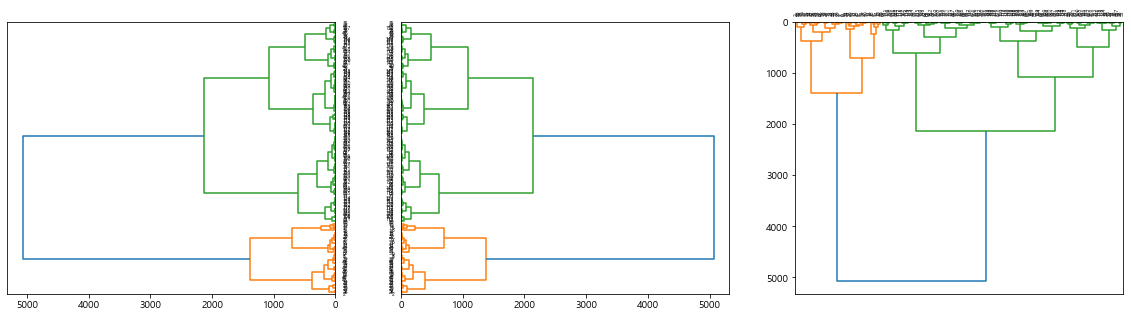

In [11]:
#덴드로그램 회전시키기
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
d1 = dendrogram(linkage(wine_df,method='ward'),orientation='left')

ax2 = fig.add_subplot(1,3,2)
d2 = dendrogram(linkage(wine_df,method='ward'),orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = dendrogram(linkage(wine_df,method='ward'),orientation='bottom')